REGR ALPHA 0.0


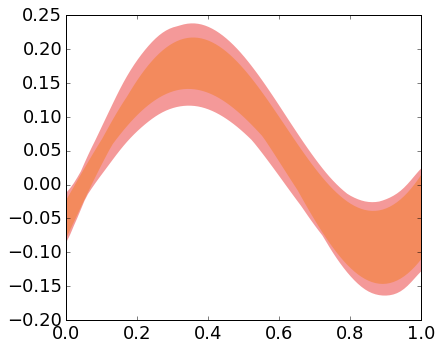

Dist to Singular: 2.08432641336e-21
Smallest SV: 9.89083919338e-22


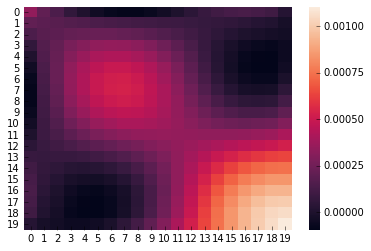

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ll4ma_movement_primitives.promps import ProMP, ProMPConfig, Waypoint
from ll4ma_movement_primitives.phase_variables import LinearPV
from ll4ma_movement_primitives.basis_functions import GaussianLinearBFS


    
sns.set_palette("deep")

num_demos = 10
dt = 0.01
duration = 1.0
duration += dt # to get time points to line up correctly
t = np.arange(0.0, duration, dt)
noise = 0.03
A = np.array([.2, .2, .01, -.05])
X = np.vstack( (np.sin(5*t), t**2, t, np.ones((1,len(t))) ))
        
Y = np.zeros((num_demos, len(t)))
demos = []
for traj in range(0, num_demos):
    sample = np.dot(A + noise * np.random.randn(1,4), X)[0]
    demos.append(sample)
            
ds = None
for d in demos:
    ds = d if ds is None else np.vstack((ds, d))
upper = np.max(ds, axis=0)
lower = np.min(ds, axis=0)
plt.figure(figsize=(14,12))
plt.xlim(0.0, 1.0)
plt.subplot(221)
plt.fill_between(t, lower, upper, facecolor=sns.xkcd_rgb['goldenrod'], alpha=0.4, lw=0.0)
        
config = ProMPConfig()
config.num_bfs = 20
config.alpha = 0.001
config.state_types = ['q']
config.dimensions = [[1]]        
        
p = ProMP(demos, config=config)
p.learn(duration=duration)
        
gens = []
for i in range(100):
    gens.append(p.generate_trajectory(dt, duration))
gs = None
for g, _ in gens:
    q = g['q'][1]
    gs = q if gs is None else np.vstack((gs, q))
g_upper = np.max(gs, axis=0)
g_lower = np.min(gs, axis=0)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.fill_between(t, g_lower, g_upper, facecolor=sns.xkcd_rgb['red'], alpha=0.4, lw=0.0)
        
 
plt.show()
p.plot_sigma_w()